In [1]:
%matplotlib inline

# Cluster Analysis 

This notebook prototypes the cluster analysis visualizers that I'm currently putting together.

**NOTE**: Currently I'm using the sklearn `make_blobs` function to create test datasets with specific numbers of clusters. However, in order to add this to the documentation, we should add a real dataset. 

In [9]:
import sys 
sys.path.append("../..")

import yellowbrick as yb 
import matplotlib.pyplot as plt 

from functools import partial
from sklearn.datasets import make_blobs as sk_make_blobs
from sklearn.datasets import make_circles, make_moons

In [5]:
# Helpers for easy dataset creation 
N_SAMPLES = 1000 
N_FEATURES = 12 
SHUFFLE = True 

# Make blobs partial 
make_blobs = partial(sk_make_blobs, n_samples=N_SAMPLES, n_features=N_FEATURES, shuffle=SHUFFLE)

## Elbow Method 

This method runs multiple clustering instances and computes the average silhoutte score for each K. Model selection works by selecting the K that is the "elbow" of a curve that looks like an arm. 

In [6]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

### 8 Blobs Dataset 

This series shows the use of different metrics with a dataset that does contain centers

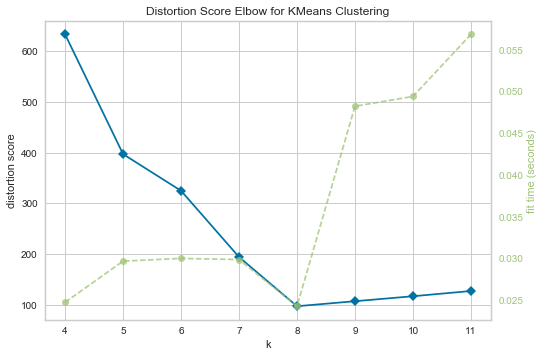

In [7]:
## Make 8 blobs dataset 
X, y = make_blobs(centers=8)
visualizer = KElbowVisualizer(KMeans(), k=(4,12))
visualizer.fit(X)
visualizer.poof()

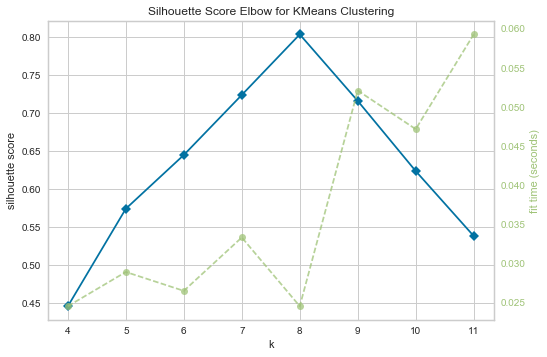

In [10]:
visualizer = KElbowVisualizer(KMeans(), k=(4,12), metric="silhouette")
visualizer.fit(X)
visualizer.poof()

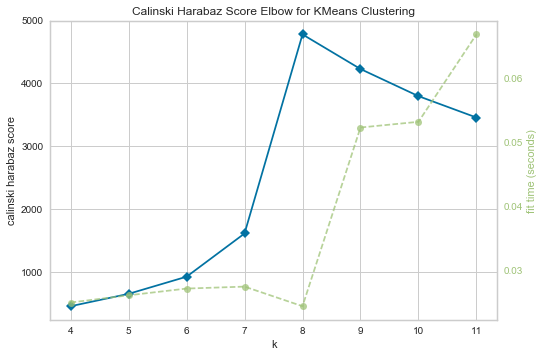

In [11]:
visualizer = KElbowVisualizer(KMeans(), k=(4,12), metric="calinski_harabaz")
visualizer.fit(X)
visualizer.poof()

### Datasets without Centers

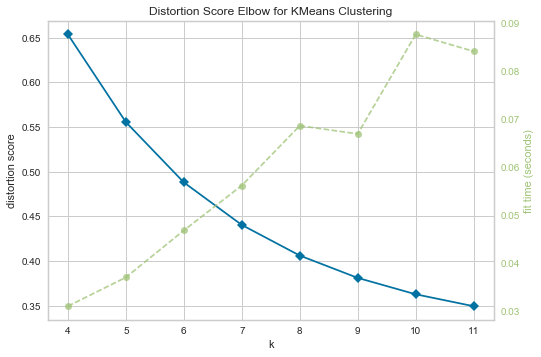

In [12]:
## Make cicles dataset 
X, y = make_circles(n_samples=N_SAMPLES)
visualizer = KElbowVisualizer(KMeans(), k=(4,12))
visualizer.fit(X)
visualizer.poof()

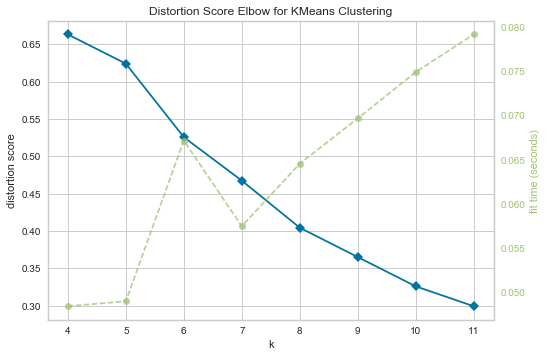

In [13]:
## Make moons dataset 
X, y = make_moons(n_samples=N_SAMPLES)
visualizer = KElbowVisualizer(KMeans(), k=(4,12))
visualizer.fit(X)
visualizer.poof()

## Silhouette Score 

Visualizer using the silhouette score metric 

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer

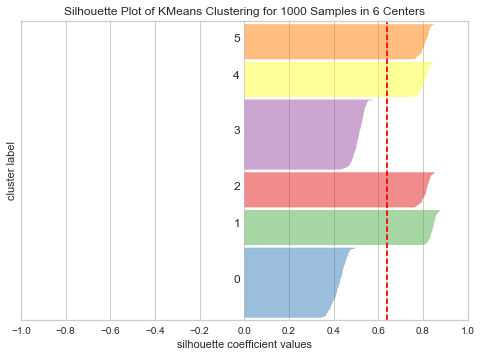

In [15]:
## Make 8 blobs dataset 
X, y = make_blobs(centers=8)
visualizer = SilhouetteVisualizer(KMeans(6))
visualizer.fit(X)
visualizer.poof()